# Importing Libraries

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.3/316.3 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.8 MB/s eta 

In [1]:
import gradio as gr

ModuleNotFoundError: No module named 'gradio'

In [2]:
import numpy as np
import tensorflow as tf
import os
import PIL
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout, experimental
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.callbacks import EarlyStopping
from keras.applications import VGG16
from keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report

# Load Dataset

In [7]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [8]:
!kaggle competitions download -c dog-breed-identification

 99% 684M/691M [00:11<00:00, 98.6MB/s]
100% 691M/691M [00:11<00:00, 61.9MB/s]


In [9]:
import zipfile

# Ekstrak file dataset yang telah diunduh
with zipfile.ZipFile('dog-breed-identification.zip', 'r') as zip_ref:
    zip_ref.extractall('dog_breed_data')

In [10]:
import pandas as pd

labels_df = pd.read_csv('dog_breed_data/labels.csv')
labels_df.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [11]:
import os
import shutil

# Buat folder untuk setiap ras anjing
for breed in labels_df['breed'].unique():
    os.makedirs(f'dog_breed_data/train/{breed}', exist_ok=True)

# Pindahkan gambar ke folder yang sesuai
for index, row in labels_df.iterrows():
    breed = row['breed']
    img_id = row['id']
    src = f'dog_breed_data/train/{img_id}.jpg'
    dst = f'dog_breed_data/train/{breed}/{img_id}.jpg'
    shutil.move(src, dst)

In [12]:
import pathlib

data_dir = pathlib.Path('dog_breed_data/train')

dog_breed_data/train/whippet/28ca80be375615da41042f81b55db5e3.jpg


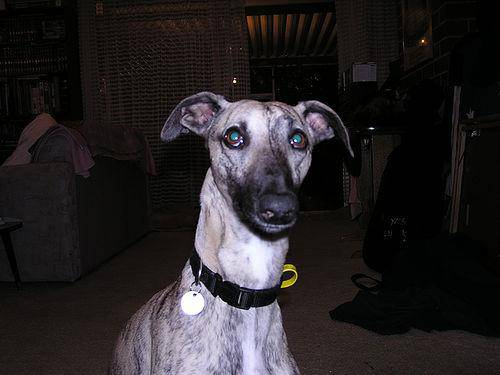

In [13]:
whippet = list(data_dir.glob('whippet/*'))
print(whippet[0])
PIL.Image.open(str(whippet[0]))

dog_breed_data/train/saluki/816da6c9a52fa67ad45bee98657e541b.jpg


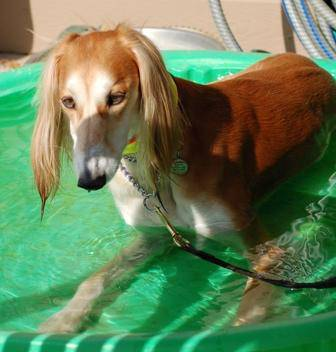

In [14]:
saluki = list(data_dir.glob('saluki/*'))
print(saluki[0])
PIL.Image.open(str(saluki[0]))

In [16]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=10,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=128,
    subset='training'
)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=128,
    subset='validation'
)

Found 8221 images belonging to 120 classes.
Found 2001 images belonging to 120 classes.


In [15]:
# img_height,img_width=180,180
# batch_size=32
# train_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="training",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 10222 files belonging to 120 classes.
Using 8178 files for training.


In [ ]:
# val_ds = tf.keras.preprocessing.image_dataset_from_directory(
#   data_dir,
#   validation_split=0.2,
#   subset="validation",
#   seed=123,
#   image_size=(img_height, img_width),
#   batch_size=batch_size)

Found 10222 files belonging to 120 classes.
Using 2044 files for validation.


In [17]:
class_names = train_gen.class_indices
print(class_names)

{'affenpinscher': 0, 'afghan_hound': 1, 'african_hunting_dog': 2, 'airedale': 3, 'american_staffordshire_terrier': 4, 'appenzeller': 5, 'australian_terrier': 6, 'basenji': 7, 'basset': 8, 'beagle': 9, 'bedlington_terrier': 10, 'bernese_mountain_dog': 11, 'black-and-tan_coonhound': 12, 'blenheim_spaniel': 13, 'bloodhound': 14, 'bluetick': 15, 'border_collie': 16, 'border_terrier': 17, 'borzoi': 18, 'boston_bull': 19, 'bouvier_des_flandres': 20, 'boxer': 21, 'brabancon_griffon': 22, 'briard': 23, 'brittany_spaniel': 24, 'bull_mastiff': 25, 'cairn': 26, 'cardigan': 27, 'chesapeake_bay_retriever': 28, 'chihuahua': 29, 'chow': 30, 'clumber': 31, 'cocker_spaniel': 32, 'collie': 33, 'curly-coated_retriever': 34, 'dandie_dinmont': 35, 'dhole': 36, 'dingo': 37, 'doberman': 38, 'english_foxhound': 39, 'english_setter': 40, 'english_springer': 41, 'entlebucher': 42, 'eskimo_dog': 43, 'flat-coated_retriever': 44, 'french_bulldog': 45, 'german_shepherd': 46, 'german_short-haired_pointer': 47, 'gian

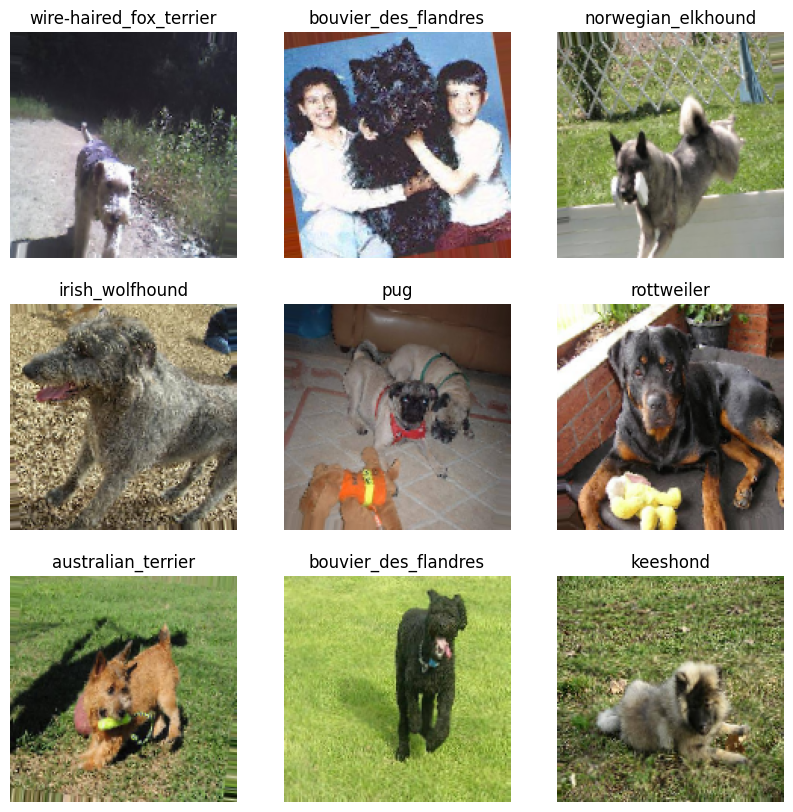

In [18]:
images, labels = next(train_gen)

class_labels = {v: k for k, v in class_names.items()}

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label_index = np.argmax(labels[i])
    plt.title(class_labels[label_index])
    plt.axis("off")
plt.show()

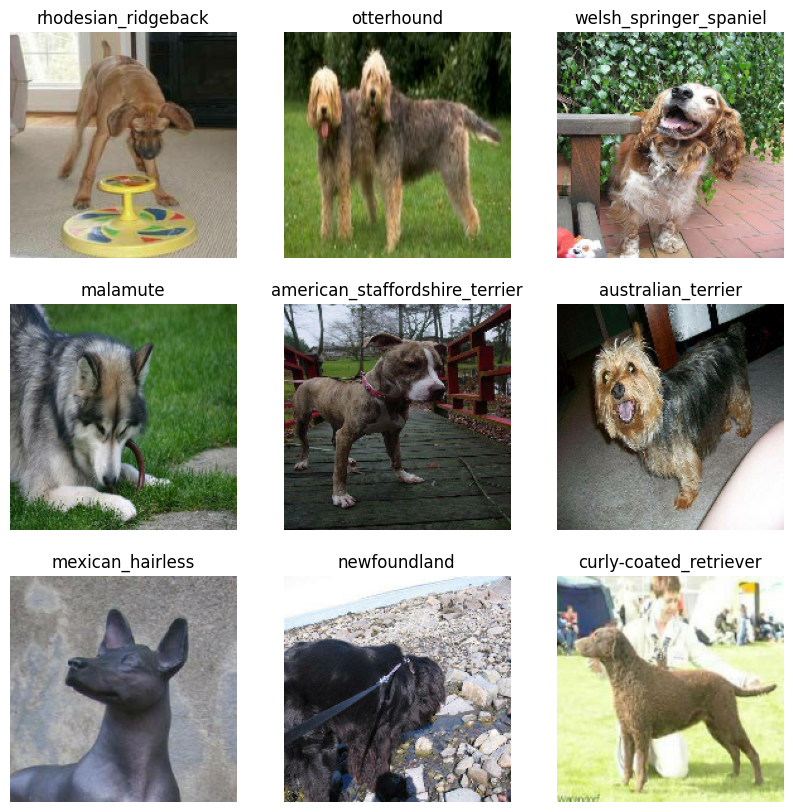

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 10))
# for images, labels in train_ds.take(1):
#   for i in range(9):
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(images[i].numpy().astype("uint8"))
#     plt.title(class_names[labels[i]])
#     plt.axis("off")

In [19]:
num_classes = 120

base_model = VGG16(include_top=False, input_shape=(150, 150, 3))
for layer in base_model.layers:
    layer.trainable = False

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

model = Model(base_model.input, x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model = Sequential([
#   experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   Conv2D(16, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Conv2D(32, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Conv2D(64, 3, padding='same', activation='relu'),
#   MaxPooling2D(),
#   Flatten(),
#   Dense(128, activation='relu'),
#   Dense(num_classes,activation='softmax')
# ])

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
epochs=10
history = model.fit(
  train_gen,
  validation_data=val_gen,
  epochs=epochs,
  callbacks=[early_stopping]
)

Epoch 1/10
65/65 [==============================] - 2816s 43s/step - loss: 5.3980 - accuracy: 0.0262 - val_loss: 5.4774 - val_accuracy: 0.0355
Epoch 2/10
65/65 [==============================] - 2820s 43s/step - loss: 4.4779 - accuracy: 0.0714 - val_loss: 4.2506 - val_accuracy: 0.0965
Epoch 3/10
65/65 [==============================] - 2776s 43s/step - loss: 3.9763 - accuracy: 0.1185 - val_loss: 3.9001 - val_accuracy: 0.1174
Epoch 4/10
65/65 [==============================] - 2792s 43s/step - loss: 3.6714 - accuracy: 0.1578 - val_loss: 3.6250 - val_accuracy: 0.1724
Epoch 5/10
65/65 [==============================] - 2804s 43s/step - loss: 3.4446 - accuracy: 0.1894 - val_loss: 3.4751 - val_accuracy: 0.1774
Epoch 6/10
65/65 [==============================] - 2777s 43s/step - loss: 3.2503 - accuracy: 0.2200 - val_loss: 3.4266 - val_accuracy: 0.1794
Epoch 7/10
65/65 [==============================] - 2773s 43s/step - loss: 3.0885 - accuracy: 0.2473 - val_loss: 3.4281 - val_accuracy: 0.1989

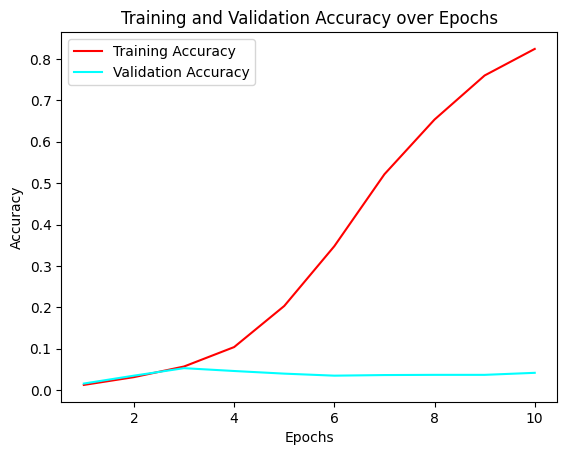

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 11)

plt.plot(epochs, history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, history.history['val_accuracy'], color='cyan', label='Validation Accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Training and Validation Accuracy over Epochs")
plt.legend()

plt.show()

In [ ]:
model.save("Model_RasAnjing.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras.preprocessing.image import load_img, img_to_array

def predict_image(img):
  img = load_img(img, target_size=(180, 180))
  plt.imshow(img)
  plt.axis('off')
  plt.show()
  input_arr = img_to_array(img)
  input_arr = np.array([input_arr])
  prediction = model.predict(input_arr)[0]
  return {class_names[i]: (prediction[i]) for i in range(120)}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


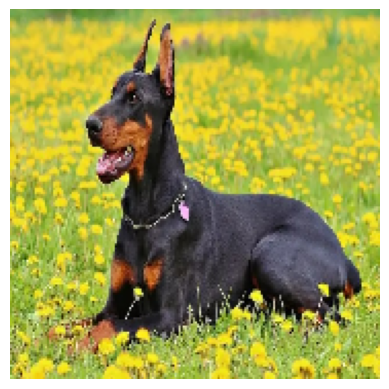

1/1 [==============================] - 0s 93ms/step


{'affenpinscher': 4.5385314e-05,
 'afghan_hound': 6.9715986e-07,
 'african_hunting_dog': 0.018238861,
 'airedale': 9.520593e-06,
 'american_staffordshire_terrier': 3.1077285e-10,
 'appenzeller': 2.0576448e-07,
 'australian_terrier': 2.2380118e-06,
 'basenji': 4.751771e-10,
 'basset': 3.8659576e-13,
 'beagle': 5.6687636e-12,
 'bedlington_terrier': 1.1767437e-12,
 'bernese_mountain_dog': 5.5736848e-05,
 'black-and-tan_coonhound': 3.7897366e-06,
 'blenheim_spaniel': 5.0222477e-15,
 'bloodhound': 4.9697683e-05,
 'bluetick': 2.9434075e-08,
 'border_collie': 3.751317e-05,
 'border_terrier': 9.943379e-07,
 'borzoi': 7.469874e-09,
 'boston_bull': 1.48355985e-08,
 'bouvier_des_flandres': 0.00013242027,
 'boxer': 1.5719791e-10,
 'brabancon_griffon': 1.0937109e-05,
 'briard': 0.0029948638,
 'brittany_spaniel': 4.2379948e-13,
 'bull_mastiff': 2.9223712e-10,
 'cairn': 1.1576731e-06,
 'cardigan': 1.1821616e-07,
 'chesapeake_bay_retriever': 9.080309e-08,
 'chihuahua': 6.003689e-09,
 'chow': 2.5290172

In [ ]:
predict_image('/content/drive/MyDrive/animal predict/dog/3_dog.jpg')

In [ ]:
import tempfile

def predict_from_array(img_array):
    temp_img_path = None
    try:
        # Create a temporary file to save the image
        temp_img = tempfile.NamedTemporaryFile(delete=False, suffix='.jpg')
        temp_img_path = temp_img.name
        temp_img.close()

        # Save the image array to the temporary file
        img = PIL.Image.fromarray(img_array)
        img.save(temp_img_path)

        # Predict using the temporary file path
        result = predict_image(temp_img_path)
    finally:
        # Remove the temporary file
        if temp_img_path and os.path.exists(temp_img_path):
            os.remove(temp_img_path)

    return result

In [ ]:
image = gr.Image()
label = gr.Label(num_top_classes=12)

gr.Interface(fn=predict_from_array, inputs=image, outputs=label).launch(debug='True')

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://7173336c3840032473.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 51ms/step
